# Importing The Libaries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Loading The Data

In [2]:
df_videos  = pd.read_csv('../input/youtube/GBvideos.csv', error_bad_lines=False)

df_videos .head()

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 2398: expected 11 fields, saw 21\nSkipping line 2797: expected 11 fields, saw 21\n'


,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_total,thumbnail_link,date
0,jt2OHQh0HoQ,Live Apple Event - Apple September Event 2017 ...,Apple Event,28,apple events|apple event|iphone 8|iphone x|iph...,7426393,78240,13548,705,https://i.ytimg.com/vi/jt2OHQh0HoQ/default_liv...,13.09
1,AqokkXoa7uE,Holly and Phillip Meet Samantha the Sex Robot ...,This Morning,24,this morning|interview|holly willoughby|philli...,494203,2651,1309,0,https://i.ytimg.com/vi/AqokkXoa7uE/default.jpg,13.09
2,YPVcg45W0z4,My DNA Test Results! I'm WHAT?!,emmablackery,24,emmablackery|emma blackery|emma|blackery|briti...,142819,13119,151,1141,https://i.ytimg.com/vi/YPVcg45W0z4/default.jpg,13.09
3,T_PuZBdT2iM,getting into a conversation in a language you ...,ProZD,1,skit|korean|language|conversation|esl|japanese...,1580028,65729,1529,3598,https://i.ytimg.com/vi/T_PuZBdT2iM/default.jpg,13.09
4,NsjsmgmbCfc,Baby Name Challenge!,Sprinkleofglitter,26,sprinkleofglitter|sprinkle of glitter|baby gli...,40592,5019,57,490,https://i.ytimg.com/vi/NsjsmgmbCfc/default.jpg,13.09


In [3]:
df_comments  = pd.read_csv('../input/youtube/GBcomments.csv', error_bad_lines=False)

df_comments .head()


/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 113225: expected 4 fields, saw 5\n'
b'Skipping line 158379: expected 4 fields, saw 7\nSkipping line 241590: expected 4 fields, saw 5\nSkipping line 245637: expected 4 fields, saw 7\n'
b'Skipping line 521402: expected 4 fields, saw 5\n'


,video_id,comment_text,likes,replies
0,jt2OHQh0HoQ,It's more accurate to call it the M+ (1000) be...,0,0
1,jt2OHQh0HoQ,To be there with a samsung phone\n😂😂😂,1,0
2,jt2OHQh0HoQ,"Thank gosh, a place I can watch it without hav...",0,0
3,jt2OHQh0HoQ,What happened to the home button on the iPhone...,0,0
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0


In [4]:
df_videos.isnull().sum()

video_id          0
title             0
channel_title     0
category_id       0
tags              0
views             0
likes             0
dislikes          0
comment_total     0
thumbnail_link    0
date              0
dtype: int64

In [5]:
df_comments.shape

(718452, 4)

In [6]:
df_comments.dropna(inplace=True)

In [7]:
# 從評論數據框中移除任何帶有缺失數據的行
df_comments.dropna(inplace=True)

# 確保'likes'和'replies'列的數據類型為整數，以便一致性數據處理
df_comments['likes'] = df_comments['likes'].astype(int)
df_comments['replies'] = df_comments['replies'].astype(int)

In [8]:
df_comments["comment_text"] = df_comments["comment_text"].str.lower()
df_comments.head()

,video_id,comment_text,likes,replies
0,jt2OHQh0HoQ,it's more accurate to call it the m+ (1000) be...,0,0
1,jt2OHQh0HoQ,to be there with a samsung phone\n😂😂😂,1,0
2,jt2OHQh0HoQ,"thank gosh, a place i can watch it without hav...",0,0
3,jt2OHQh0HoQ,what happened to the home button on the iphone...,0,0
4,jt2OHQh0HoQ,power is the disease. care is the cure. keep...,0,0


In [9]:
import string
import re

# 定義一個函數來移除標點符號和轉換文本為小寫
def clean_text(text):
    # 移除標點符號
    text = re.sub(f'[{string.punctuation}]', '', text)
    # 轉換文本為小寫
    text = text.lower()
    return text

# 應用清理函數到評論的文本
df_comments['comment_text'] = df_comments['comment_text'].apply(clean_text)

# 顯示處理後的前幾行數據
df_comments.head()


,video_id,comment_text,likes,replies
0,jt2OHQh0HoQ,its more accurate to call it the m 1000 becaus...,0,0
1,jt2OHQh0HoQ,to be there with a samsung phone\n😂😂😂,1,0
2,jt2OHQh0HoQ,thank gosh a place i can watch it without havi...,0,0
3,jt2OHQh0HoQ,what happened to the home button on the iphone...,0,0
4,jt2OHQh0HoQ,power is the disease care is the cure keep c...,0,0


# Remove emoticons

In [10]:
df_comments['comment_text'] = df_comments['comment_text'].str.replace('\d+', '')

def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

df_comments['comment_text'] = df_comments['comment_text'].apply(remove_emoji)
df_comments.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


,video_id,comment_text,likes,replies
0,jt2OHQh0HoQ,its more accurate to call it the m because th...,0,0
1,jt2OHQh0HoQ,to be there with a samsung phone\n,1,0
2,jt2OHQh0HoQ,thank gosh a place i can watch it without havi...,0,0
3,jt2OHQh0HoQ,what happened to the home button on the iphone...,0,0
4,jt2OHQh0HoQ,power is the disease care is the cure keep c...,0,0


# Emotion analysis

# Emotion analysis

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '10'),
  Text(3, 0, '15'),
  Text(4, 0, '17'),
  Text(5, 0, '19'),
  Text(6, 0, '20'),
  Text(7, 0, '22'),
  Text(8, 0, '23'),
  Text(9, 0, '24'),
  Text(10, 0, '25'),
  Text(11, 0, '26'),
  Text(12, 0, '27'),
  Text(13, 0, '28'),
  Text(14, 0, '29')])

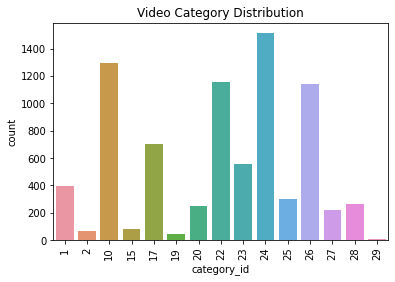

In [11]:
# 頻率分佈
df_comments['comment_text'] = df_comments['comment_text'].apply(lambda x: ' '.join([word for word in x.split() if len(word) > 2]))
sns.countplot(x='category_id', data=df_videos)
plt.title('Video Category Distribution')
plt.xticks(rotation=90)


In [12]:
from textblob import TextBlob

Text(0.5, 1.0, 'Sentiment Distribution')

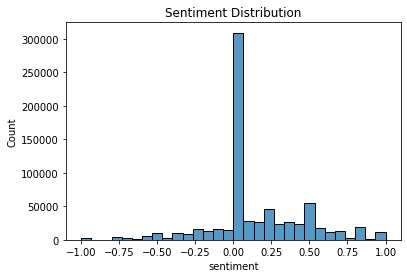

In [13]:
# 情感標記、情感分佈圖
def detect_sentiment(text):
    return TextBlob(text).sentiment.polarity

df_comments['sentiment'] = df_comments['comment_text'].apply(detect_sentiment)

sns.histplot(df_comments['sentiment'], bins=30)
plt.title('Sentiment Distribution')


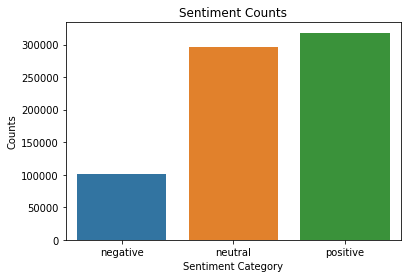

In [14]:
# 分類情緒分數
df_comments['sentiment_category'] = pd.cut(
    df_comments['sentiment'],
    bins=[-1, -0.01, 0.01, 1],
    labels=['negative', 'neutral', 'positive']
)

# 計算每個類別的計數
sentiment_counts = df_comments['sentiment_category'].value_counts()

# 繪製情緒計數長條圖
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.title('Sentiment Counts')
plt.xlabel('Sentiment Category')
plt.ylabel('Counts')
plt.show()


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Glyph 48169 (\N{HANGUL SYLLABLE BANG}) missing from current font.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Glyph 53444 (\N{HANGUL SYLLABLE TAN}) missing from current font.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from current font.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from current font.
  
/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48169 (\N{HANGUL SYLLABLE BANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserW

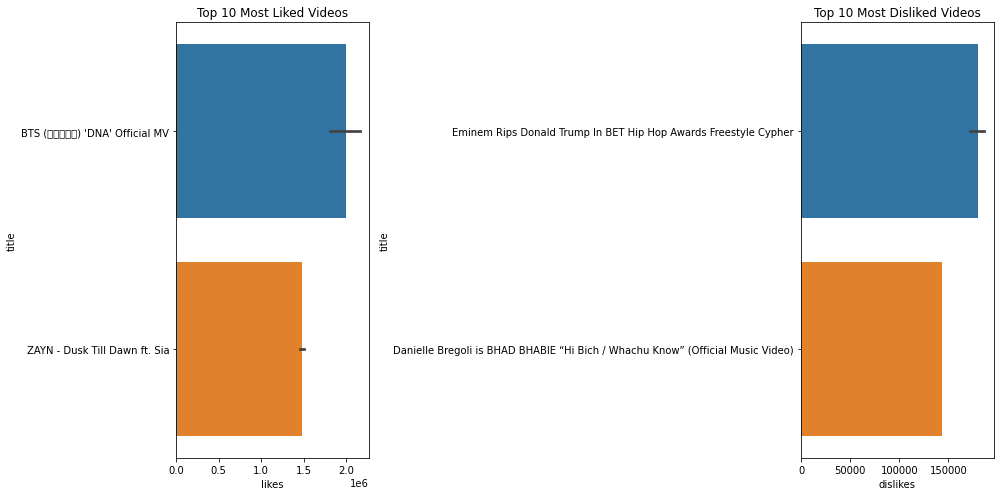

In [15]:
# 找到最多喜歡和最多不喜歡的視頻
top_likes = df_videos.nlargest(10, 'likes')
top_dislikes = df_videos.nlargest(10, 'dislikes')

# 繪製最多喜歡的視頻條形圖
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
sns.barplot(x='likes', y='title', data=top_likes)
plt.title('Top 10 Most Liked Videos')

# 繪製最多不喜歡的視頻條形圖
plt.subplot(1, 2, 2)
sns.barplot(x='dislikes', y='title', data=top_dislikes)
plt.title('Top 10 Most Disliked Videos')

plt.tight_layout()
plt.show()


# Distribution of likes vs. views

# Distribution of likes vs. views

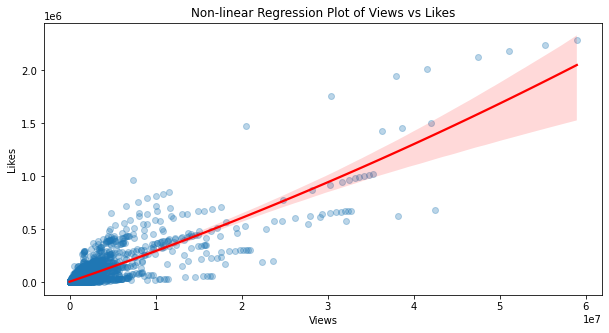

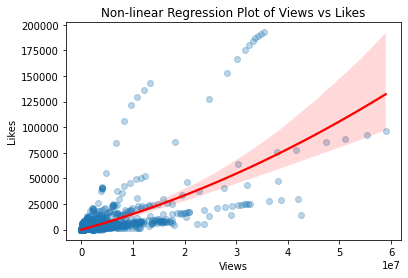

In [16]:
plt.figure(figsize=(10, 5))

# 加入一個非線性回歸線，這裡用的是二次多項式回歸
sns.regplot(x='views', y='likes', data=df_videos, 
            scatter_kws={'alpha':0.3}, line_kws={"color": "red"}, order=2)

plt.title('Non-linear Regression Plot of Views vs Likes')
plt.xlabel('Views')
plt.ylabel('Likes')
plt.show()


# 加入一個非線性回歸線，這裡用的是二次多項式回歸
sns.regplot(x='views', y='dislikes', data=df_videos, 
            scatter_kws={'alpha':0.3}, line_kws={"color": "red"}, order=2)

plt.title('Non-linear Regression Plot of Views vs Likes')
plt.xlabel('Views')
plt.ylabel('Likes')
plt.show()



# Average views, average likes, average dislikes

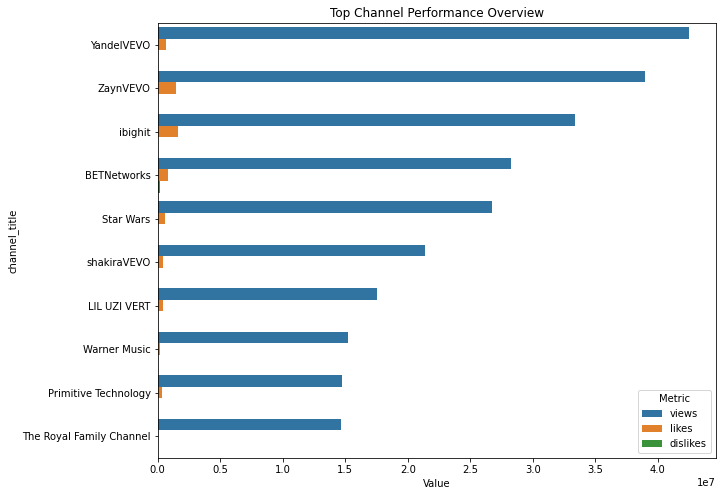

In [17]:
# 計算每個頻道的平均觀看次數、平均喜歡次數、平均不喜歡次數
channel_performance = df_videos.groupby('channel_title').agg({
    'views': 'mean',
    'likes': 'mean',
    'dislikes': 'mean'
}).reset_index()

# 選擇觀看次數最高的前10個頻道
top_channels = channel_performance.nlargest(10, 'views')

# 繪製每個頻道的綜合表現概覽圖
top_channels_melted = top_channels.melt(id_vars='channel_title', var_name='Metric', value_name='Value')
plt.figure(figsize=(10, 8))  # 調整圖表大小
sns.barplot(x='Value', y='channel_title', hue='Metric', data=top_channels_melted)
plt.title('Top Channel Performance Overview')
plt.show()


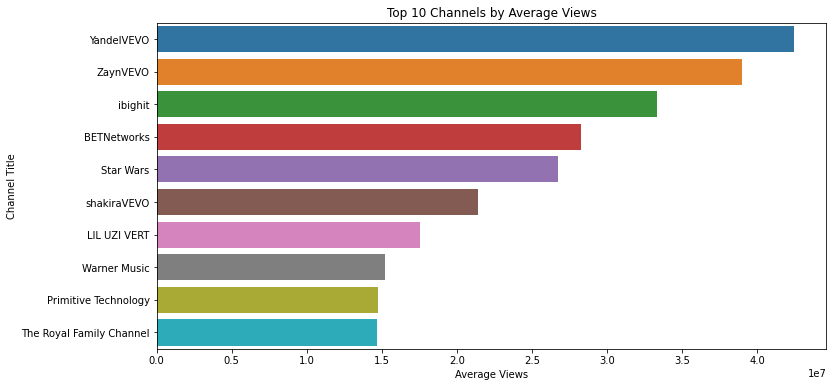

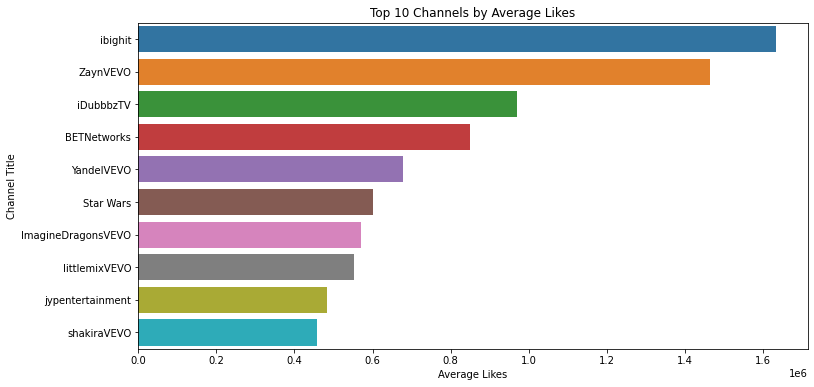

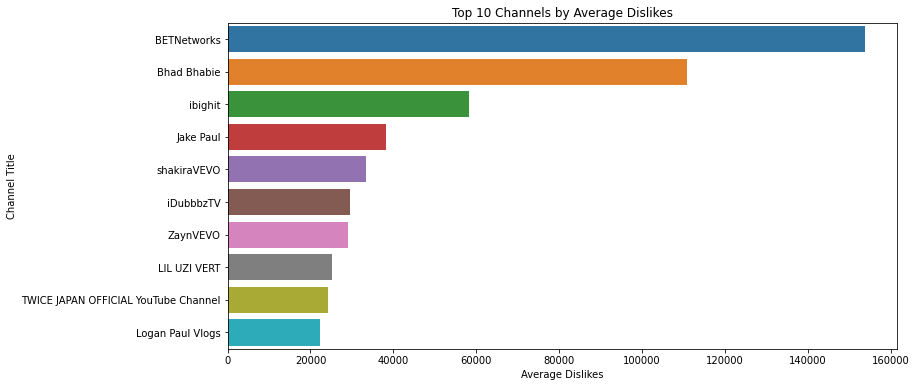

In [18]:
# 選擇平均觀看次數最高的前10個頻道
top_channels_views = channel_performance.nlargest(10, 'views')

# 使用長條圖來繪製每個頻道的平均觀看次數
plt.figure(figsize=(12, 6))
sns.barplot(x='views', y='channel_title', data=top_channels_views)
plt.title('Top 10 Channels by Average Views')
plt.xlabel('Average Views')
plt.ylabel('Channel Title')
plt.show()

# 選擇平均喜歡次數最高的前10個頻道
top_channels_likes = channel_performance.nlargest(10, 'likes')

# 使用長條圖來繪製每個頻道的平均喜歡次數
plt.figure(figsize=(12, 6))
sns.barplot(x='likes', y='channel_title', data=top_channels_likes)
plt.title('Top 10 Channels by Average Likes')
plt.xlabel('Average Likes')
plt.ylabel('Channel Title')
plt.show()

# 選擇平均不喜歡次數最高的前10個頻道
top_channels_dislikes = channel_performance.nlargest(10, 'dislikes')

# 使用長條圖來繪製每個頻道的平均不喜歡次數
plt.figure(figsize=(12, 6))
sns.barplot(x='dislikes', y='channel_title', data=top_channels_dislikes)
plt.title('Top 10 Channels by Average Dislikes')
plt.xlabel('Average Dislikes')
plt.ylabel('Channel Title')
plt.show()


# EDA analysis

In [19]:
# 使用TextBlob進行情感分析並創建新列'pol'存儲結果
df_comments['pol'] = df_comments['comment_text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# 進行統計分析
df_unique = df_comments.groupby('video_id')['pol'].value_counts().unstack().fillna(0)
# 根據需求進一步處理df_unique

In [20]:
# 初始化列表以收集數據
id_list = []
positive_comment_counts = []
negative_comment_counts = []
neutral_comment_counts = []

# 遍歷每個唯一的影片ID
for video_id in set(df_comments['video_id']):
    id_list.append(video_id)
    
    # 取得目前影片ID的所有評論
    current_comments = df_comments[df_comments['video_id'] == video_id]
    
    # 計算正面、負面和中立評論的數量
    positive_count = (current_comments['pol'] > 0).sum()
    negative_count = (current_comments['pol'] < 0).sum()
    neutral_count = (current_comments['pol'] == 0).sum()
    
    # 將計數新增至列表
    positive_comment_counts.append(positive_count)
    negative_comment_counts.append(negative_count)
    neutral_comment_counts.append(neutral_count)

# 建立一個新的DataFrame來儲存收集的數據
df_unique = pd.DataFrame({
    'id': id_list,
    'pos_comm': positive_comment_counts,
    'neg_comm': negative_comment_counts,
    'neutral_comm': neutral_comment_counts
})

# 計算總評論數
df_unique['total_comments'] = df_unique['pos_comm'] + df_unique['neg_comm'] + df_unique['neutral_comm']

# 展示前幾行資料以驗證
df_unique.head()


,id,pos_comm,neg_comm,neutral_comm,total_comments
0,uNseVux0CA4,281,97,318,696
1,AgnqfXHMnZ8,203,136,161,500
2,iKzRIweSBLA,395,57,247,699
3,P3MBQciFeHo,271,88,241,600
4,5xgX_tNTWgs,286,168,243,697


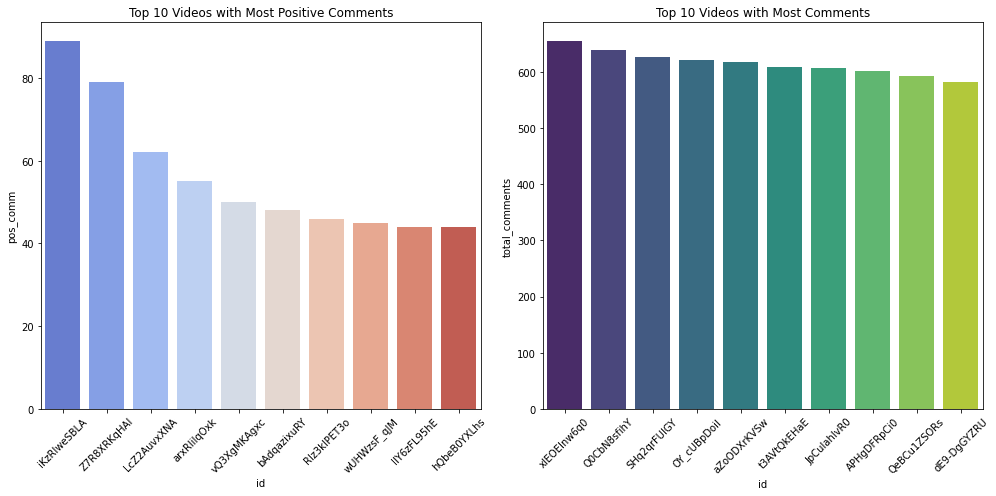

In [21]:
# 新增輔助函數來計算評論的正面、負面和中性數量
def calculate_sentiment_counts(video_id, df):
    sentiment_counts = df[df.video_id == video_id]['sentiment'].value_counts()
    pos = sentiment_counts.get(1, 0)
    neg = sentiment_counts.get(-1, 0)
    neutral = sentiment_counts.get(0, 0)
    return pos, neg, neutral

# 使用更簡潔的循環來產生統計數據
stats_data = {
    'id': [],
    'pos_comm': [],
    'neg_comm': [],
    'neutral_comm': []
}

for video_id in df_comments['video_id'].unique():
    pos, neg, neutral = calculate_sentiment_counts(video_id, df_comments)
    stats_data['id'].append(video_id)
    stats_data['pos_comm'].append(pos)
    stats_data['neg_comm'].append(neg)
    stats_data['neutral_comm'].append(neutral)

# 建立DataFrame
df_unique = pd.DataFrame(stats_data)
df_unique['total_comments'] = df_unique['pos_comm'] + df_unique['neg_comm'] + df_unique['neutral_comm']

# 視覺化調整
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)

# 使用自訂顏色
sns.barplot(x='id', y='pos_comm', data=df_unique.sort_values(by='pos_comm', ascending=False).head(10), palette='coolwarm')
plt.title('Top 10 Videos with Most Positive Comments')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.barplot(x='id', y='total_comments', data=df_unique.sort_values(by='total_comments', ascending=False).head(10), palette='viridis')
plt.title('Top 10 Videos with Most Comments')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


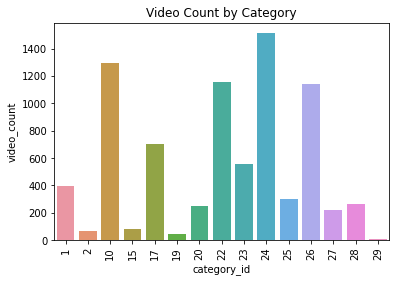

In [22]:
# 根據類別計算視頻數量
category_count = df_videos['category_id'].value_counts().reset_index()
category_count.columns = ['category_id', 'video_count']

# 繪製每個類別的視頻數量分布圖
sns.barplot(x='category_id', y='video_count', data=category_count)
plt.title('Video Count by Category')
plt.xticks(rotation=90)
plt.show()


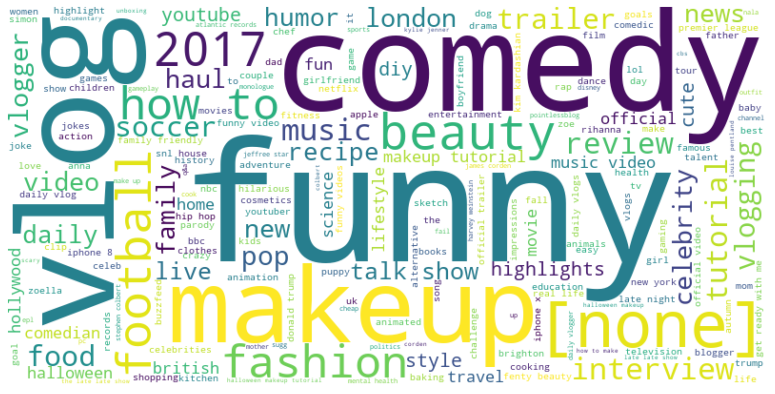

In [23]:
# 分析視頻標籤的頻率
from collections import Counter
tags_list = df_videos['tags'].str.replace('"', '').str.lower().str.split('|').explode()
tag_counts = Counter(tags_list)

# 創建一個詞雲圖
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate_from_frequencies(tag_counts)

# 顯示詞雲圖
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


# Category analysis

In [24]:
cat_id_mapping = {
    2: 'Autos & Vehicles',
    1: 'Film & Animation',
    10: 'Music',
    15: 'Pets & Animals',
    17: 'Sports',
    19: 'Travel & Events',
    20: 'Gaming',
    22: 'People & Blogs',
    23: 'Comedy',
    24: 'Entertainment',
    25: 'News & Politics',
    26: 'Howto & Style',
    27: 'Education',
    28: 'Science & Technology',
    29: 'Nonprofits & Activism',
    43: 'Shows'
}

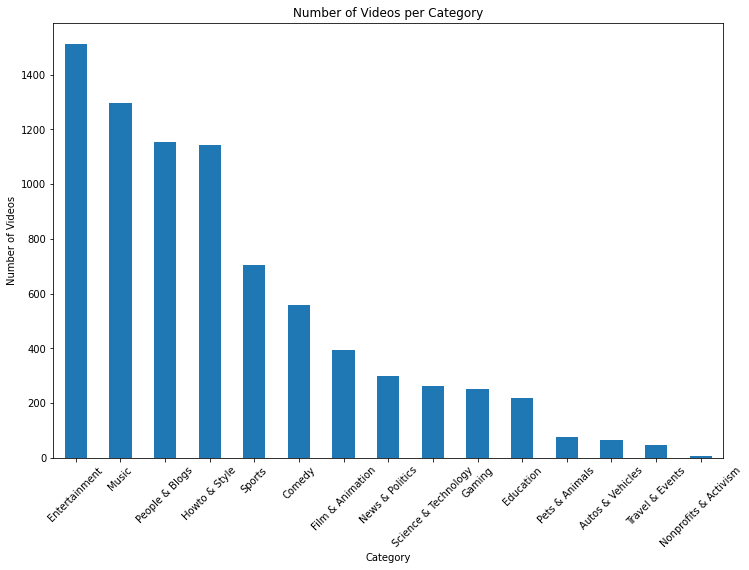

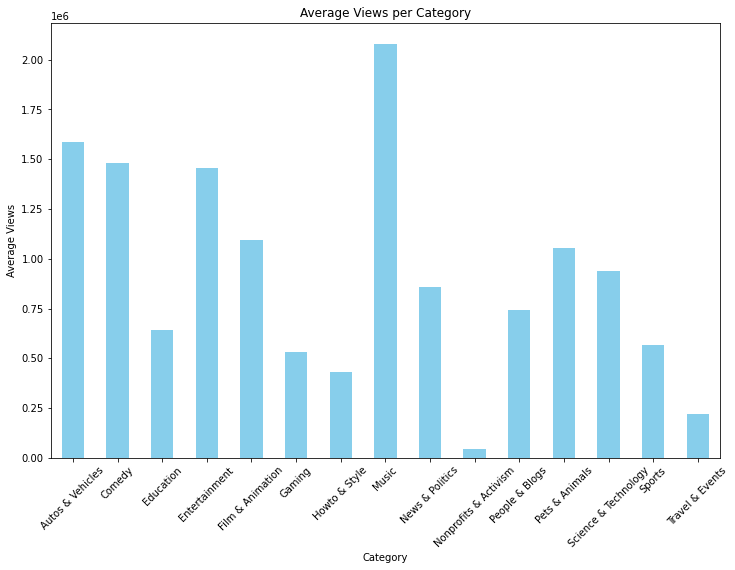

In [25]:
# 將 category_id 對應到特定的影片類別名稱
df_videos['category_name'] = df_videos['category_id'].map(cat_id_mapping)

# 計算每個類別的影片數量
category_counts = df_videos['category_name'].value_counts()

# 計算每個類別的平均觀看次數
average_views_by_category = df_videos.groupby('category_name')['views'].mean()

# 建立一個長條圖展示每個類別的影片數量
plt.figure(figsize=(12, 8))
category_counts.plot(kind='bar')
plt.title('Number of Videos per Category')
plt.xlabel('Category')
plt.ylabel('Number of Videos')
plt.xticks(rotation=45)
plt.show()

# 建立一個長條圖顯示每個類別的平均觀看次數
plt.figure(figsize=(12, 8))
average_views_by_category.plot(kind='bar', color='skyblue')
plt.title('Average Views per Category')
plt.xlabel('Category')
plt.ylabel('Average Views')
plt.xticks(rotation=45)
plt.show()


In [26]:
# 平均觀看次數、喜歡和不喜歡

# 確保已經將category_id對應到了特定的類別名稱
df_videos['category_name'] = df_videos['category_id'].map(cat_id_mapping)

# 計算每個類別的平均觀看次數、按讚和點擊次數
average_stats_by_category = df_videos.groupby('category_name').agg({
    'views': 'mean',
    'likes': 'mean',
    'dislikes': 'mean'
}).reset_index()

# 展示结果
average_stats_by_category

# 這張圖表顯示了YouTube視頻不同類別的平均觀看次數、平均喜歡次數和平均不喜歡次數。
# 從這張圖表中，我們可以看出某些類別如“音樂”和“娛樂”在觀看次數上遠遠超過其他類別，這可能表明這些類別更受觀眾喜愛或更容易吸引觀眾。
# 同時，也可以看到“娛樂”類別的視頻獲得的喜歡次數很多，但與此同時不喜歡的次數也相對較多，這可能表明這類視頻引起了較多觀眾的強烈情感反應。

,category_name,views,likes,dislikes
0,Autos & Vehicles,1.585368e+06,14391.522388,606.835821
1,Comedy,1.481752e+06,67511.353680,1777.723519
2,Education,6.436411e+05,22212.418182,958.318182
3,Entertainment,1.454258e+06,41017.046927,2591.570390
4,Film & Animation,1.092647e+06,21434.572519,998.468193
5,Gaming,5.320212e+05,19492.996032,813.940476
6,Howto & Style,4.334489e+05,21930.817308,547.718531
7,Music,2.079413e+06,88484.615266,2925.427140
8,News & Politics,8.600541e+05,5949.832215,772.771812
9,Nonprofits & Activism,4.575275e+04,118.375000,23.000000


In [27]:
# 評論數量

# 首先需要將評論資料與影片資料合併，以取得每個評論對應的影片類別
df_merged = pd.merge(df_comments, df_videos[['video_id', 'category_name']], on='video_id', how='left')

# 然後按影片類別計算每個類別的平均評論數
average_comments_by_category = df_merged.groupby('category_name')['comment_text'].count().reset_index()

# 展示结果
average_comments_by_category

# 這張圖表顯示了不同類別視頻的評論總數，這是衡量觀眾參與度的一個指標。
# “娛樂”和“人物與博客”類別的視頻評論數量較多，這表明這些類別的視頻在觀眾中引起了較多的討論，可能因為這些視頻更能激起觀眾的興趣和反應。
# 相比之下，某些類別如“非營利組織與行動主義”的評論數量較少，這可能是由於這些類別的視頻較少或觀眾互動程度低。

,category_name,comment_text
0,Autos & Vehicles,34023
1,Comedy,311794
2,Education,119202
3,Entertainment,827077
4,Film & Animation,215307
5,Gaming,113982
6,Howto & Style,616147
7,Music,721001
8,News & Politics,138925
9,Nonprofits & Activism,112


In [28]:
# 情感分析

# 定義情緒分析函數
def detect_sentiment(text):
    return TextBlob(text).sentiment.polarity

# 應用情緒分析函數到評論文本
df_comments['sentiment'] = df_comments['comment_text'].apply(detect_sentiment)

# 將評論資料與影片資料合併，以取得每個評論對應的影片類別
df_merged = pd.merge(df_comments, df_videos[['video_id', 'category_name']], on='video_id', how='left')

# 以影片類別計算每個類別評論的平均情緒分數
average_sentiment_by_category = df_merged.groupby('category_name')['sentiment'].mean().reset_index()

# 展示结果
average_sentiment_by_category

# 這張圖表基於評論的文本情感分析結果，顯示了不同類別視頻觀眾的平均情感極性。
# 情感值越接近1，表示評論的正面情感越強；值越接近-1，表示負面情感越強。
# 在這張圖表中，“Howto & Style”和“Nonprofits & Activism”類別的情感極性較高，這可能表明這些類別的視頻引起了較多的正面反應。
# 而“News & Politics”類別的情感極性較低，這可能是由於新聞類視頻容易引起爭議和混合情感反應。

,category_name,sentiment
0,Autos & Vehicles,0.067839
1,Comedy,0.107256
2,Education,0.074514
3,Entertainment,0.106273
4,Film & Animation,0.096563
5,Gaming,0.071978
6,Howto & Style,0.210507
7,Music,0.161756
8,News & Politics,0.027639
9,Nonprofits & Activism,0.244118
